# Plot context counts with examples
In which we plot frequency versus unique context counts to show the linear relationship between them.

In [3]:
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

## Load data

In [4]:
tf = pd.read_csv('../../data/frequency/2013_2016_tf_norm_log.tsv', sep='\t', index_col=0)
c3 = pd.read_csv('../../data/frequency/2013_2016_unique_3gram_counts.tsv', sep='\t', index_col=0)

In [10]:
# log-transform
c3 = c3.applymap(lambda x: pd.np.log10(x + 1.))

In [11]:
shared_idx = tf.index & c3.index
tf_mean = tf.mean(axis=1).loc[shared_idx]
c3_mean = c3.mean(axis=1).loc[shared_idx]

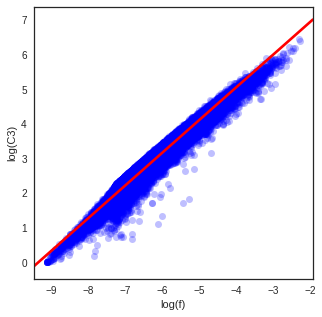

In [17]:
x_label = 'log(f)'
y_label = 'log(C3)'
label_size = 18
line_color = 'r'
scatter_color = 'b'
scatter_alpha = 0.25
plt.figure(figsize=(5, 5))
sns.regplot(tf_mean, c3_mean, line_kws={'color': line_color}, scatter_kws={'color' : scatter_color, 'alpha' : scatter_alpha})
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()

Now annotate!

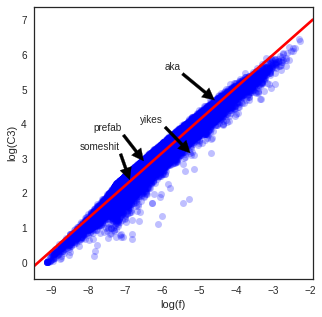

In [32]:
example_innovations = ['someshit', 'prefab', 'yikes', 'aka']
x_label = 'log(f)'
y_label = 'log(C3)'
label_size = 18
line_color = 'r'
scatter_color = 'b'
scatter_alpha = 0.25
xy_offset = [-50, 30]
arrow_width = 3
arrow_color = 'k'
plt.figure(figsize=(5, 5))
sns.regplot(tf_mean, c3_mean, line_kws={'color': line_color}, scatter_kws={'color' : scatter_color, 'alpha' : scatter_alpha})
plt.xlabel(x_label)
plt.ylabel(y_label)
for i in example_innovations:
    x = tf_mean.loc[i]
    y = c3_mean.loc[i]
    plt.annotate(i, xy=(x,y), xycoords='data', xytext=xy_offset, textcoords='offset points', 
                 arrowprops={'width':arrow_width, 'color':arrow_color})
plt.show()

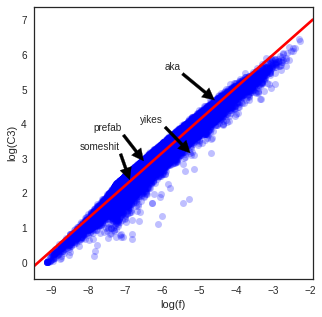

In [36]:
example_innovations = ['someshit', 'prefab', 'yikes', 'aka']
x_label = 'log(f)'
y_label = 'log(C3)'
label_size = 24
line_color = 'r'
scatter_color = 'b'
scatter_edge_color = 'w'
scatter_alpha = 0.25
xy_offset = [-50, 30]
arrow_width = 3
arrow_color = 'k'
plt.figure(figsize=(5, 5))
sns.regplot(tf_mean, c3_mean, line_kws={'color': line_color}, scatter_kws={'color' : scatter_color, 
                                                                           'alpha' : scatter_alpha, 
                                                                           'edgecolor' : scatter_edge_color})
plt.xlabel(x_label)
plt.ylabel(y_label)
for i in example_innovations:
    x = tf_mean.loc[i]
    y = c3_mean.loc[i]
    plt.annotate(i, xy=(x,y), xycoords='data', xytext=xy_offset, textcoords='offset points', 
                 arrowprops={'width':arrow_width, 'color':arrow_color})
plt.savefig('../../output/frequency_vs_context_counts_with_examples.pdf', bbox_inches='tight')